In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm_notebook as tqdm

In [2]:
def read_snap(idx, sim='Nbody-tp', lvl='lvl4-1x', parttype=[2, 3, 5], fields=['Coordinates', 'Velocities'],
              basepath = '/n/holyscratch01/hernquist_lab/abeane/starbar_runs/runs/'):
    fname = basepath + sim + '/' + lvl + '/output'
    return arepo.Snapshot(fname, idx, parttype=parttype, fields=fields, combineFiles=True)


In [3]:
def find_keys_within(pos, target_pos, R, center=np.array([0, 0, 0])):
    dist = np.linalg.norm(pos - center - target_pos, axis=1)
    return dist < R

def compute_vR_vphi(pos, vel):
    R = np.linalg.norm(pos[:,:2], axis=1)
    cphi = pos[:,0]/R
    sphi = pos[:,1]/R
    
    vR = vel[:,0] * cphi + vel[:,1] * sphi
    vphi = vel[:,1] * cphi - vel[:,0] * sphi
    return vR, vphi

def extract_pos_vel(snap, sun_pos, R):
    keys_disk = find_keys_within(snap.part2.pos, sun_pos, R)
    keys_bulge = find_keys_within(snap.part3.pos, sun_pos, R)
    keys_test = find_keys_within(snap.part5.pos, sun_pos, R)
    
    pos_disk = snap.part2.pos[keys_disk]
    pos_bulge = snap.part3.pos[keys_bulge]
    pos_test = snap.part5.pos[keys_test]
    
    vel_disk = snap.part2.vel[keys_disk]
    vel_bulge = snap.part3.vel[keys_bulge]
    vel_test = snap.part5.vel[keys_test]
    
    pos_real = np.concatenate((pos_disk, pos_bulge))
    vel_real = np.concatenate((vel_disk, vel_bulge))
    
    vR_real, vphi_real = compute_vR_vphi(pos_real, vel_real)
    vR_test, vphi_test = compute_vR_vphi(pos_test, vel_test)
    
    return vR_real, vphi_real, vR_test, vphi_test
    

In [6]:
snap_1x = read_snap(500, lvl='lvl4-1x')
snap_8x = read_snap(500, lvl='lvl4-8x')

sun_pos = np.array([8.2, 0, 0])
R = 0.8

vR_real_1x, vphi_real_1x, vR_test_1x, vphi_test_1x = extract_pos_vel(snap_1x, sun_pos, R)
vR_real_8x, vphi_real_8x, vR_test_8x, vphi_test_8x = extract_pos_vel(snap_8x, sun_pos, R)

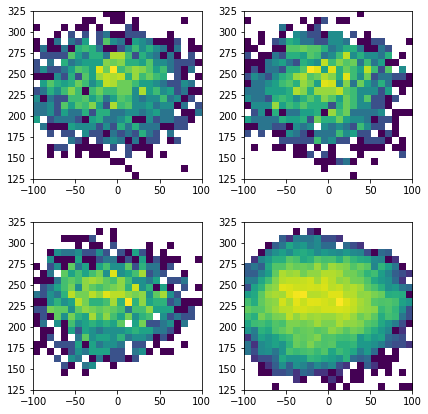

In [71]:
my_range = [[-100, 100], [125, 325]]
bins = (24, 24)

heatmap_real_1x, _, _ = np.histogram2d(vR_real_1x, vphi_real_1x, bins=bins, range=my_range)
heatmap_test_1x, _, _ = np.histogram2d(vR_test_1x, vphi_test_1x, bins=bins, range=my_range)
heatmap_real_8x, _, _ = np.histogram2d(vR_real_8x, vphi_real_8x, bins=bins, range=my_range)
heatmap_test_8x, _, _ = np.histogram2d(vR_test_8x, vphi_test_8x, bins=bins, range=my_range)

fig, ax = plt.subplots(2, 2, figsize=(6,6))

extent = [my_range[0][0], my_range[0][1], my_range[1][0], my_range[1][1]]
ax[0][0].imshow(heatmap_real_1x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[0][1].imshow(heatmap_test_1x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[1][0].imshow(heatmap_real_8x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[1][1].imshow(heatmap_test_8x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())

fig.tight_layout()

# ax[0].set(xlabel='vR [km/s]', ylabel='vphi [km/s]')
# ax[1].set(xlabel='vR [km/s]')
# ax[2].set(xlabel='vR [km/s]')

plt.show()

In [7]:
snap_1x = read_snap(100, lvl='lvl4-1x')
snap_8x = read_snap(100, lvl='lvl4-8x')
snap_64x = read_snap(100, lvl='lvl4-64x')

sun_pos = np.array([8.2, 0, 0])
R = 0.8

vR_real_1x, vphi_real_1x, vR_test_1x, vphi_test_1x = extract_pos_vel(snap_1x, sun_pos, R)
vR_real_8x, vphi_real_8x, vR_test_8x, vphi_test_8x = extract_pos_vel(snap_8x, sun_pos, R)
vR_real_64x, vphi_real_64x, vR_test_64x, vphi_test_64x = extract_pos_vel(snap_64x, sun_pos, R)

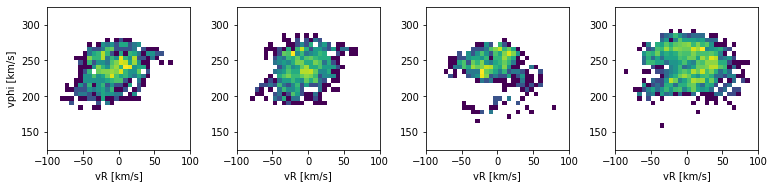

In [59]:
my_range = [[-100, 100], [125, 325]]
bins = (32, 32)

heatmap_real, _, _ = np.histogram2d(vR_real, vphi_real, bins=bins, range=my_range)
heatmap_1x, _, _ = np.histogram2d(vR_1x, vphi_1x, bins=bins, range=my_range)
heatmap_8x, _, _ = np.histogram2d(vR_8x[::8], vphi_8x[::8], bins=bins, range=my_range)
# np.random.shuffle(vR_64x)
# np.random.shuffle(vphi_64x)
heatmap_64x, _, _ = np.histogram2d(vR_64x[::64], vphi_64x[::64], bins=bins, range=my_range)

fig, ax = plt.subplots(1, 4, figsize=(8*4/3, 3))

extent = [my_range[0][0], my_range[0][1], my_range[1][0], my_range[1][1]]
ax[0].imshow(heatmap_real.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[1].imshow(heatmap_1x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[2].imshow(heatmap_8x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[3].imshow(heatmap_64x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())

fig.tight_layout()

ax[0].set(xlabel='vR [km/s]', ylabel='vphi [km/s]')
ax[1].set(xlabel='vR [km/s]')
ax[2].set(xlabel='vR [km/s]')
ax[3].set(xlabel='vR [km/s]')

plt.show()

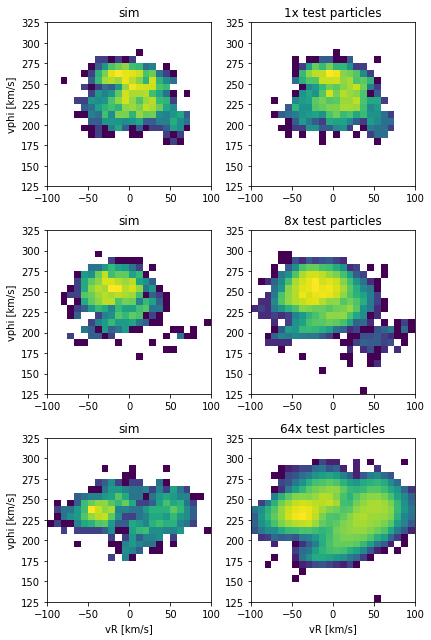

In [12]:
my_range = [[-100, 100], [125, 325]]
bins = (24, 24)

heatmap_real_1x, _, _ = np.histogram2d(vR_real_1x, vphi_real_1x, bins=bins, range=my_range)
heatmap_test_1x, _, _ = np.histogram2d(vR_test_1x, vphi_test_1x, bins=bins, range=my_range)
heatmap_real_8x, _, _ = np.histogram2d(vR_real_8x, vphi_real_8x, bins=bins, range=my_range)
heatmap_test_8x, _, _ = np.histogram2d(vR_test_8x, vphi_test_8x, bins=bins, range=my_range)
heatmap_real_64x, _, _ = np.histogram2d(vR_real_64x, vphi_real_64x, bins=bins, range=my_range)
heatmap_test_64x, _, _ = np.histogram2d(vR_test_64x, vphi_test_64x, bins=bins, range=my_range)

fig, ax = plt.subplots(3, 2, figsize=(6,9))

extent = [my_range[0][0], my_range[0][1], my_range[1][0], my_range[1][1]]
ax[0][0].imshow(heatmap_real_1x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[0][1].imshow(heatmap_test_1x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[1][0].imshow(heatmap_real_8x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[1][1].imshow(heatmap_test_8x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[2][0].imshow(heatmap_real_64x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax[2][1].imshow(heatmap_test_64x.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())


ax[2][0].set(xlabel='vR [km/s]', ylabel='vphi [km/s]')
ax[2][1].set(xlabel='vR [km/s]')
ax[1][0].set(ylabel='vphi [km/s]')
ax[0][0].set(ylabel='vphi [km/s]')

ax[0][0].set_title('sim')
ax[1][0].set_title('sim')
ax[2][0].set_title('sim')
ax[0][1].set(title='1x test particles')
ax[1][1].set(title='8x test particles')
ax[2][1].set(title='64x test particles')

fig.tight_layout()



plt.show()